<a href="https://colab.research.google.com/github/eborin/SSL-course/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[View Source Code](https://github.com/eborin/SSL-course/blob/main/03_pytorch_computer_vision.ipynb)

# PyTorch Computer Vision

This notebook is an adaptation of the `03_pytorch_computer_vision.ipynb` distributed by Daniel Bourke at [https://github.com/mrdbourke/pytorch-deep-learning](https://github.com/mrdbourke/pytorch-deep-learning).

Feel free to explore either Daniel Burke's or my GitHub repository.
If you find the material helpful, consider following or giving the projects a ⭐ to show your support!
* <a href="https://github.com/mrdbourke/pytorch-deep-learning" target="_parent">Daniel Burke's PyTorch Deep Learning course on GitHub</a>
* <a href="https://github.com/eborin/SSL-course" target="_parent">Edson Borin's SSL course on GitHub</a>

## 1. Introduction

### 1.1 Objective

The main objective of this tutorial is to revise basic PyTorch building blocks for building and training computer vision models.

WARNING: This tutorial is not intended to be a complete guide to PyTorch nor a guide to help students learn PyTorch.

### 1.2 What is Computer Vision?

[Computer vision](https://en.wikipedia.org/wiki/Computer_vision) is the art of teaching a computer to see.

For example, it could involve building a model to classify whether a photo is of a cat or a dog ([binary classification](https://developers.google.com/machine-learning/glossary#binary-classification)).

Or whether a photo is of a cat, dog or chicken ([multi-class classification](https://developers.google.com/machine-learning/glossary#multi-class-classification)).

Or identifying where a car appears in a video frame ([object detection](https://en.wikipedia.org/wiki/Object_detection)).

Or figuring out where different objects in an image can be separated ([panoptic segmentation](https://arxiv.org/abs/1801.00868)).

![example computer vision problems](https://raw.githubusercontent.com/eborin/SSL-course/main/images/db/03-computer-vision-problems.png)
*Example computer vision problems for binary classification, multiclass classification, object detection and segmentation.*

### 1.3 Where does computer vision get used?

If you use a smartphone, you've already used computer vision.

Camera and photo apps use [computer vision to enhance](https://machinelearning.apple.com/research/panoptic-segmentation) and sort images.

Modern cars use [computer vision](https://youtu.be/j0z4FweCy4M?t=2989) to avoid other cars and stay within lane lines.

Manufacturers use computer vision to identify defects in various products.

Security cameras use computer vision to detect potential intruders.

In essence, anything that can be described in a visual sense can be a potential computer vision problem.

### 1.4 What we're going to cover

We're going to apply the PyTorch Workflow we've been learning in the previous tutorials to computer vision.

![a PyTorch workflow with a computer vision focus](https://raw.githubusercontent.com/eborin/SSL-course/main/images/db/03-pytorch-computer-vision-workflow.png)

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| [**2. Computer vision libraries in PyTorch**](#sec_2) | PyTorch has a bunch of built-in helpful computer vision libraries, let's check them out.  |
| [**3. Getting a dataset**](#sec_3) | To practice computer vision, we'll start with some images of different pieces of clothing from [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). |
| [**4. Setting Up a DataLoader**](#sec_4) | We've got some images, let's load them in with a [PyTorch `DataLoader`](https://pytorch.org/docs/stable/data.html) so we can use them with our training loop. |
| [**5. Model V0: Building a baseline model**](#sec_5) | Here we'll create a simple (linear) multi-class classification model to learn patterns in the data. We'll also create our **training loop**. |
| [**6. Model V1: Building a non-linear model**](#sec_6) | Here we'll change our baseline model by adding non-linear layers. |
| [**7. Model V2: Building a Convolutional Neural Network**](#sec_7) | This version of the model will employ the convolutional neural network architecture. |
| [**8. Handling the challenge of shape mismatches**](#sec_8) | We will discuss how to inspect the effect of layers on tensor shapes. |
| [**9. (Extra) Make and evaluate random predictions**](#sec_9) | Let's make some predictions on random images and evaluate our best model. |
| [**10. (Extra) Making a confusion matrix**](#sec_10) | A confusion matrix is a great way to evaluate a classification model, let's see how we can make one. |

### 1.5 Where can you get help?

Besides discussing with your colleagues and the course professor, you may try asking questions on the [Discussions page](https://github.com/mrdbourke/pytorch-deep-learning/discussions).

There's also the [PyTorch developer forums](https://discuss.pytorch.org/), a very helpful place for all things PyTorch.

And of course, there's the [PyTorch documentation](https://pytorch.org/docs/stable/index.html) and [PyTorch developer forums](https://discuss.pytorch.org/), a very helpful place for all things PyTorch.

## <a id='sec_2'>2. Computer vision libraries in PyTorch</a>

Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. |
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. |
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  |
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

Now we've covered some of the most important PyTorch computer vision libraries, let's import the relevant dependencies.


In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.6.0+cu124
torchvision version: 0.21.0+cu124


Let's also select the device to run our experiments.

In [ ]:
# Setup device agnostic code
if torch.cuda.is_available():
    device = "cuda" # Use NVIDIA GPU (if available)
elif torch.backends.mps.is_available():
    device = "mps" # Use Apple Silicon GPU (if available)
else:
    device = "cpu" # Default to CPU if no GPU is available

# Uncomment the next line if you want to force device = "cpu"
# device = "cpu"

print(f"Using device: {device}")

# Auxiliary function to set both the CPU and GPU seeds
def set_seed(seed):
    torch.manual_seed(seed)
    if device == "cuda": torch.cuda.manual_seed(seed)

Using device: cuda


## <a id='sec_3'>3. Getting a dataset</a>

To begin working on a computer vision problem, let's get a computer vision dataset.

We're going to start with FashionMNIST.

### 3.1 The FashionMNIST dataset

MNIST stands for Modified National Institute of Standards and Technology.

The [original MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) contains thousands of examples of handwritten digits (from 0 to 9) and was used to build computer vision models to identify numbers for postal services.

[FashionMNIST](https://github.com/zalandoresearch/fashion-mnist), made by Zalando Research, is a similar setup.

Except it contains grayscale images of 10 different kinds of clothing.

![example image of FashionMNIST](https://raw.githubusercontent.com/eborin/SSL-course/main/images/db/03-fashion-mnist-slide.png)
*`torchvision.datasets` contains a lot of example datasets you can use to practice writing computer vision code on. FashionMNIST is one of those datasets. And since it has 10 different image classes (different types of clothing), it's a multi-class classification problem.*

Later, we'll be building a computer vision neural network to identify the different styles of clothing in these images.

As discussed before, PyTorch has a bunch of common computer vision datasets stored in `torchvision.datasets`.

Including FashionMNIST in [`torchvision.datasets.FashionMNIST()`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html).

To download it, the FashionMNIST class provide the following parameters:
* `root: str` - which folder do you want to download the data to?
* `train: Bool` - do you want the training or test split?
* `download: Bool` - should the data be downloaded?
* `transform: torchvision.transforms` - what transformations would you like to do on the data?
* `target_transform` - you can transform the targets (labels) if you like too.

Many other datasets in `torchvision` have these parameter options.

### 3.2 Downloading the dataset

So, lets start by downloading the training set from the Fashion MNIST dataset.

In [ ]:
# Setup training data
train_dataset = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)


After executing the previous code block, you may find a copy of the FashionMNIST dataset on a folder named `data`.

Ok, now, for our purposes, lets split the data into training and validation sets. The `random_split` function randomly split a given dataset in multiple subsets.

In [ ]:
from torch.utils.data import random_split

set_seed(42)

# Define split sizes (e.g., 80% training, 20% validation)
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size

# Split the dataset
train_data, val_data = random_split(train_dataset, [train_size, val_size])


Now, let's check out the first sample of the training data.

In [ ]:
# See first training sample
image, label = train_data[0]
print("Image:", image)
print("Label      :", label)
print("type(image):", type(image))

Image: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1529, 0.2353, 0.2000,
          0.2235, 0.1961, 0.2157, 0.2078, 0.1961, 0.1922, 0.1647, 0.1725,
          0.1804, 0.1843, 0.2353, 0.0431],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.5216, 0.6196, 0.5922,
          0.7529, 0.7725, 0.8118, 0.7882, 0.8549, 

Ok, it is large tensor and the sample belongs to class 9.

### 3.3 Input and output shapes of a computer vision model

We've got a big tensor with lots of values (the image) leading to a single value for the target (the label).

Let's see the image shape.

In [ ]:
# What's the shape of the image?
image.shape

torch.Size([1, 28, 28])

The shape of the image tensor is `[1, 28, 28]` or more specifically:

```
[color_channels=1, height=28, width=28]
```

Having `color_channels=1` means the image is grayscale.

![example input and output shapes of the fashionMNIST problem](https://raw.githubusercontent.com/eborin/SSL-course/main/images/db/03-computer-vision-input-and-output-shapes.png)
*Various problems will have various input and output shapes. But the premise remains: encode data into numbers, build a model to find patterns in those numbers, convert those patterns into something meaningful.*

If `color_channels=3`, the image comes in pixel values for red, green, and blue (this is also known as the [RGB color model](https://en.wikipedia.org/wiki/RGB_color_model)).

The order of our current tensor is often referred to as `CHW` (Color Channels, Height, Width).

There's debate on whether images should be represented as `CHW` (color channels first) or `HWC` (color channels last).

> **Note:** You'll also see `NCHW` and `NHWC` formats where `N` stands for *number of images*.
For example if you have a `batch_size=32`, your tensor shape may be `[32, 1, 28, 28]`.
We'll cover batch sizes later.

PyTorch generally accepts `NCHW` (channels first) as the default for many operators.

However, PyTorch also explains that `NHWC` (channels last) performs better and is [considered best practice](https://pytorch.org/blog/tensor-memory-format-matters/#pytorch-best-practice).

For now, since our dataset and models are relatively small, this won't make too much of a difference.

But keep it in mind for when you're working on larger image datasets and using convolutional neural networks (we'll see these later).

Let's check out more shapes of our data.

In [ ]:
# How many samples are there?
len(train_data), len(val_data)

(48000, 12000)

So we've got 48,000 training samples and 12,000 validation samples.

In this dataset, the targets (or sample classes) are numbers from 0 to 9 that identify the image class.
The dataset contains a table that allows us to map these numbers to more human friendly strings.
This table is provided via the `.classes` attribute.

In [ ]:
# See classes
class_names = train_dataset.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Sweet! It looks like we're dealing with 10 different kinds of clothes.

Because we're working with 10 different classes, it means our problem is **multi-class classification**.

Let's get visual.

### 3.4 Visualizing our data

Image shape: torch.Size([1, 28, 28])


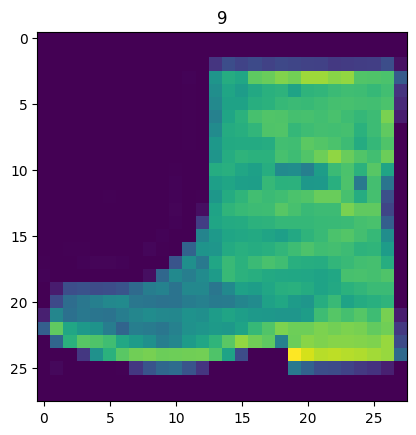

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
# image shape is [1, 28, 28] (colour channels, height, width) but imshow expects height x width.
# We will use the squeeze method to drop the dimensions with size 1.
plt.imshow(image.squeeze())
plt.title(label);

We can turn the image into grayscale using the `cmap` parameter of `plt.imshow()`.
Also, we can convert the label from a number (9) into a human friendly string using the `class_names` table.

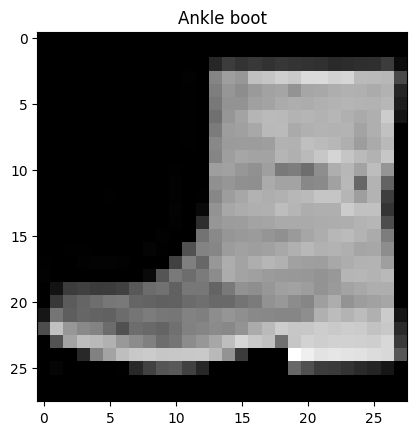

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

Beautiful, well as beautiful as a pixelated grayscale ankle boot can get.

Let's view a few more.

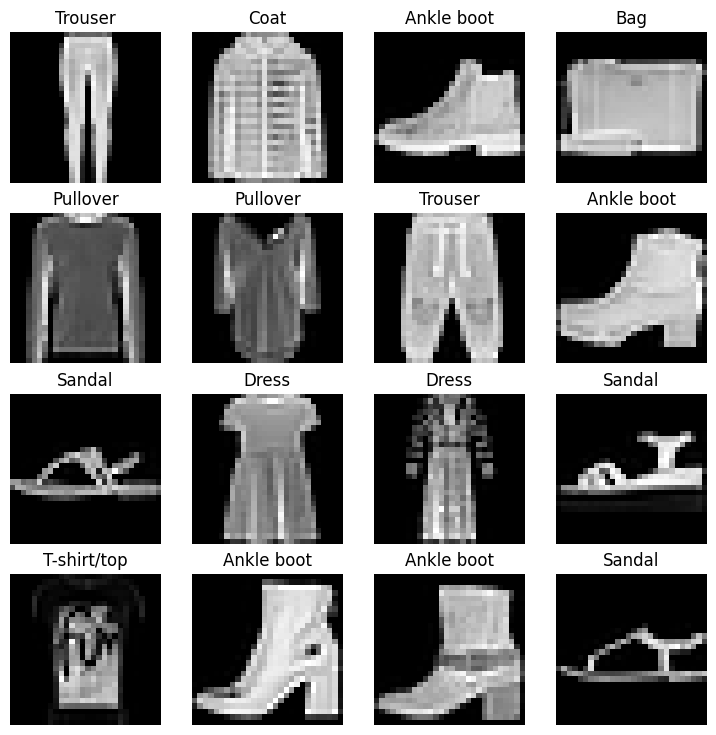

In [ ]:
# Plot 16 images on a grid of 4 x 4 images
set_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

Hmmm, this dataset doesn't look too aesthetic.

But the principles we're going to learn on how to build a model for it will be similar across a wide range of computer vision problems.

In essence, taking pixel values and building a model to find patterns in them to use on future pixel values.

Plus, even for this small dataset (yes, even 60,000 images in deep learning is considered quite small), could you write a program to classify each one of them?

You probably could.

But I think coding a model in PyTorch would be faster.

## <a id='sec_4'>4. Setting Up a DataLoader</a>

Now we've got a dataset ready to go.

The next step is to prepare it with a [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) or `DataLoader` for short.

The `DataLoader` does what you think it might do.

It helps sampling data from a dataset when training or evaluating an ML model.

It turns a large `Dataset` into a Python iterable of smaller chunks.

These smaller chunks are called **batches** or **mini-batches** and can be set by the `batch_size` parameter.

Why do this?

Because it's more computationally efficient.

In an ideal world you could do the forward pass and backward pass across all of your data at once (like we did in the previous tutorials when training and evaluating our polynomial models).

But when working with very large datasets, unless you have unlimited computing power, you may need to divide them into batches and process the model batch by batch for training or evaluation.

It also gives your model more opportunities to improve.

With **mini-batches** (small portions of the data), gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch).

What's a good batch size?

[32 is a good place to start](https://twitter.com/ylecun/status/989610208497360896?s=20&t=N96J_jotN--PYuJk2WcjMw) for a fair amount of problems.

But since this is a value you can set (a **hyperparameter**) you can try all different kinds of values, though generally powers of 2 are used most often (e.g., 32, 64, 128, 256, 512).

![an example of what a batched dataset looks like](https://raw.githubusercontent.com/eborin/SSL-course/main/images/db/03-batching-fashionmnist.png)
*Batching FashionMNIST with a batch size of 32 and shuffle turned on.
A similar batching process will occur for other datasets but will differ depending on the batch size.*


### 4.1 Creating and inspecting the dataloaders

Let's create `DataLoader`'s for our training and validation sets.

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch?
    shuffle=True # shuffle data every epoch?
)

val_dataloader = DataLoader(val_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the validation data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, val_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of validation dataloader: {len(val_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c263c39a110>, <torch.utils.data.dataloader.DataLoader object at 0x7c263c37b9a0>)
Length of train dataloader: 1500 batches of 32
Length of validation dataloader: 375 batches of 32


The dataloader object is an iterator and its items (batches with `BATCH_SIZE` samples) can be accessed directly with a for loop.
In this particular case, each item is a list with two values, the sample features (x) batch and the sample labels (y) batch.
The following code iterates over all batches in our `train_dataloader` and prints the shape of the batches:

In [ ]:
# Iterate over all batches
for batch_idx, (X,y) in enumerate(train_dataloader):
    if batch_idx < 10: # Print information only for the first 10 batches
        print(f"batch {batch_idx:<5d}: X batch shape:", X.shape, "y batch shape:", y.shape)

# Print the last batch
print("...")
print(f"batch {batch_idx:<5d}: X batch shape:", X.shape, "y batch shape:", y.shape)


batch 0    : X batch shape: torch.Size([32, 1, 28, 28]) y batch shape: torch.Size([32])
batch 1    : X batch shape: torch.Size([32, 1, 28, 28]) y batch shape: torch.Size([32])
batch 2    : X batch shape: torch.Size([32, 1, 28, 28]) y batch shape: torch.Size([32])
batch 3    : X batch shape: torch.Size([32, 1, 28, 28]) y batch shape: torch.Size([32])
batch 4    : X batch shape: torch.Size([32, 1, 28, 28]) y batch shape: torch.Size([32])
batch 5    : X batch shape: torch.Size([32, 1, 28, 28]) y batch shape: torch.Size([32])
batch 6    : X batch shape: torch.Size([32, 1, 28, 28]) y batch shape: torch.Size([32])
batch 7    : X batch shape: torch.Size([32, 1, 28, 28]) y batch shape: torch.Size([32])
batch 8    : X batch shape: torch.Size([32, 1, 28, 28]) y batch shape: torch.Size([32])
batch 9    : X batch shape: torch.Size([32, 1, 28, 28]) y batch shape: torch.Size([32])
...
batch 1499 : X batch shape: torch.Size([32, 1, 28, 28]) y batch shape: torch.Size([32])


Notice that in each iteration, X consists of a Tensor with shape [32, 1, 28, 28], which contains 32 samples of 1x28x28 images.
Also, y consists of a Tensor with shape [32], which contains the 32 samples lables.
> Note: the last batch may contain fewer than BATCH_SIZE samples if the dataset size if not a multiple of BATCH_SIZE.

Now, lets take the features and labels of the first batch and take a closer look.

In [ ]:
# Check out what's inside the training dataloader
# First, lets fetch the first batch
train_features_batch, train_labels_batch = next(iter(train_dataloader))

# Now, lets see the shape of the first batch
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

And we can see that the data remains unchanged by checking a single sample.

Image shape: torch.Size([1, 28, 28])
Label: 3, label size: torch.Size([])


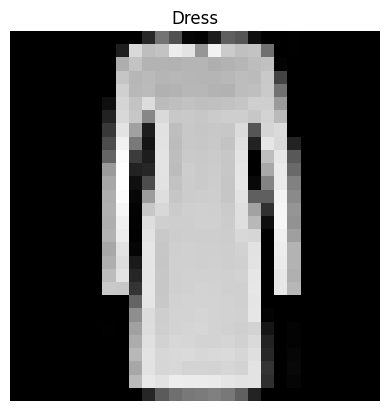

In [ ]:
# Show a sample
set_seed(1969)
# Select a random index number between 0 and 32 (batch size)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
# Retrieve the random sample from the batch and plot it
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image shape: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

### 4.2 Summary

Dataloaders are important components when training machine learning models with PyTorch.  
They organize the dataset in batches and provide iterators to facilitate the implementation of training loops.

## <a id='sec_5'>5. Model V0: Build a baseline model</a>

Our data loader is ready!

Now, it's time to build a **baseline model** by subclassing nn.Module.

A baseline model is one of the simplest models you can create.
It serves as a starting point, which you can refine and improve with more sophisticated models.


### 5.1 The flatten layer

Our baseline will use `nn.Linear()` layers.
These layers expect unidimensional tensors (i.e., vectors) as input.
Since our image data has two dimensions (28 × 28), we need to reshape it into a vector.

The `nn.Flatten()` layer handles this transformation, converting the input into a unidimensional tensor (vector).

For example, given a tensor with shape (2,2) (a matrix), applying Flatten() results in a tensor with shape (4), transforming it into a vector with four elements.

This is easier to understand when you see it.

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# Try uncommenting below and see what happens
#print(x)
#print(output)

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


The `nn.Flatten()` layer took our shape from `[color_channels, height, width]` to `[color_channels, height*width]`.

In other words, it turned our pixel data from height and width dimensions into one long **feature vector**.
Again, we need this because `nn.Linear()` layers like their inputs to be in the form of feature vectors.

### 5.2 Building the model using the `nn.Sequential()` module

Now, let's create our first model, which will contain three layers: `Flatten`, `Linear`, and `Linear`.

In neural networks, layers are typically arranged sequentially, where the output of the $i^{th}$ layer is fed as input to the $(i+1)^{th}$ layer.

We could manually instantiate these three layers and invoke them in the `forward()` method as follows:

```python
    def forward(self, x):
        t1 = self.Flatten(x)
        t2 = self.Linear1(t1)
        t3 = self.Linear2(t2)
        return t3
```

However, instead of invoking the three layers explicitly, we will use the `nn.Sequential()` class to stack our layers in a sequence.

This class encapsulates multiple layers into a single module, making the model more concise and easier to manage.
The following code encapsulates the three layers into a single module indentified by the attribute `layer_stack`.
Notice that the `forward()` methods simply invokes the `layer_stack` module, which is responsible for invoking the three layers sequentially.


In [ ]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(), # Layer to flatten the input
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

The model expects a Tensor with `input_shape` features.
First, it converts the tensor into a feature vector by invoking the `nn.Flatten()` layer.
Then, it invokes the first linear layer, which expects as input a feature vector with `input_shape` features and produces as output a feature vector with `hidden_units` features.
Notice that the `hidden_units` parameter is configurable and can be arbitrarily selected by the user when creating model V0.
The `input_shape` is also configurable, however, it must be set so it matches the number of features of the input data.
Finally, the last layer (also a linear one) expects as input a feture vector with `hidden_units` features and produces as output a feature fector with `output_shape` features.

In our experiments, we'll need to use the following parameters:
* `input_shape=784` - this is how many features you've got going in the model, in our case, it's one for every pixel in the target image (28 pixels high by 28 pixels wide = 784 features).
* `hidden_units=10` - number of units/neurons in the hidden layer(s), this number could be whatever you want but to keep the model small we'll start with `10`.
* `output_shape=len(class_names)` - since we're working with a multi-class classification problem, we need one output neuron per class.
Since our dataset has 10 classes, the model will output a vector of 10 values.
Each value represents a score indicating the likelihood that the input belongs to the corresponding class.
For example, if the output is [18, 20, 465, 0.00, ..., 0.00], it suggests that the input most likely belongs to class 2 (score = 465).

The following image provides a visual representation of our model.

![visual representation of model_0](https://raw.githubusercontent.com/eborin/SSL-course/main/images/03_pytorch_computer_vision-3.2.png)

Let's create an instance of our model.

In [ ]:
set_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
)

print(model_0)

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)


### 5.3 Helper function to compute the model accuracy

Let's create a small function to compute the model accuracy by comparing the results produced by the model (`y_pred`) agains the ground thruth (`y_true`).

In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

### 3.4 Creating our training loop

Let's create a function to train our model.

Similar to code in previous tutorials, the function will contain a loop that iterates over the epochs.
However, in this case, it will contain additional loops to iterate over the training dataloader and validation dataloader batches.

We will also use the tqdm bar to show a nice progress bar while the function trains the model and the `timeit` module to time the training process.

The cross entropy loss function will be used instead of the MAE or MSE functions because it works better for classification problems.

Finally, since we're computing on batches of data, our loss and evaluation metrics will be calculated **per batch** rather than across the whole dataset.
This means we'll have to compute the average loss and accuracy values for each epoch.

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm
# Import the default_timer from timeit to time the training process
from timeit import default_timer as timer

def train_model(model, train_dataloader, val_dataloader, device, nepochs=3):
    # Set the seed
    set_seed(42)

    # Send our model to the target device
    model = model.to(device)

    # Setup the loss function. This is also called "criterion"/"cost function" in some places
    # The cross entropy loss is more adequate for classification problems.
    loss_fn = nn.CrossEntropyLoss()

    # Setup the optimizer
    optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

    # Lists to store the training losses, validation losses, and validation accuracies over epochs
    training_losses, val_losses, val_accs = [], [], []

    # Register the start time
    train_start_time = timer()

    # For each epoch, do
    for epoch in range(nepochs):

        print(f"----------------------\nEpoch: {epoch+1} / {nepochs}")

        # Variable to register the accumulated training loss
        train_loss = 0.0

        ### Training

        # For each batch in the training dataloader, do:
        for _, (X, y) in tqdm(enumerate(train_dataloader), total=len(train_dataloader), unit=" batches", desc="Training  "):

            # Send the data to target device
            X, y = X.to(device), y.to(device)
            # Set the model to training mode
            model.train()

            # 1. Forward pass
            y_pred = model(X)
            # 2. Calculate loss (per batch)
            loss = loss_fn(y_pred, y)
            train_loss += loss.cpu().detach() # Accumulates the training losses for log purposes
            # 3. Optimizer zero grad
            optimizer.zero_grad()
            # 4. Loss backward
            loss.backward()
            # 5. Optimizer step
            optimizer.step()

        # Divide total train loss by length of train dataloader (average loss per batch per epoch)
        avg_train_loss = train_loss / len(train_dataloader)
        training_losses.append(avg_train_loss)

        ### Validating

        # Setup variables for accumulatively adding up loss and accuracy
        val_loss, val_acc = 0, 0
        # Set the model to evaluation mode
        model.eval()
        # Calculations on val metrics need to happen inside torch.inference_mode()
        with torch.inference_mode():
            # For each batch in the validation dataloader, do:
            for _, (X, y) in tqdm(enumerate(val_dataloader), total=len(val_dataloader), unit=" batches", desc="Validation "):
                # Send the data to target device
                X, y = X.to(device), y.to(device)
                # 1. Forward pass
                val_pred = model(X)
                # 2. Calculate loss (accumulatively)
                loss = loss_fn(val_pred, y)
                val_loss += loss.cpu().detach() # Accumulates the validation losses for log purposes
                # 3. Calculate validation accuracy (preds need to be same as y_true)
                val_acc += accuracy_fn(y_true=y, y_pred=val_pred.argmax(dim=1))

            # Divide total val loss by length of val dataloader (per batch)
            avg_val_loss = val_loss / len(val_dataloader)
            val_losses.append(avg_val_loss)

            # Divide total accuracy by length of val dataloader (per batch)
            val_acc /= len(val_dataloader)
            val_accs.append(val_acc)

        ## Print out what's happening
        print(f"Train loss: {avg_train_loss:.5f} | Validation loss: {avg_val_loss:.5f}, Validation accuracy: {val_acc:.2f}%\n")

    # Register the stop time
    train_stop_time = timer()
    training_elapsed_time = train_stop_time - train_start_time

    # Return the elapsed training time, the training losses,
    # the validation losses, and the validation accuracies
    return training_elapsed_time, training_losses, val_losses, val_accs

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 5.5 Training our model

Now that we have a dataloader, a model and a training loop, lets train our model.

The next code block trains the model for 20 epochs and then shows the time it took to train the model.

In [ ]:
number_of_epochs = 20

training_elapsed_time, training_losses, val_losses, val_accs = \
    train_model(model_0, train_dataloader, val_dataloader,
                device=device, nepochs=number_of_epochs)

print(f"Trained model_0 on {str(next(model_0.parameters()).device)} for {len(training_losses)} epochs in {training_elapsed_time:.3f} seconds")

----------------------
Epoch: 1 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 487.86 batches/s]


Train loss: 0.60808 | Validation loss: 0.57090, Validation accuracy: 78.75%

----------------------
Epoch: 2 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 521.82 batches/s]


Train loss: 0.48142 | Validation loss: 0.50685, Validation accuracy: 82.46%

----------------------
Epoch: 3 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 542.08 batches/s]


Train loss: 0.45747 | Validation loss: 0.46130, Validation accuracy: 84.36%

----------------------
Epoch: 4 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 501.62 batches/s]


Train loss: 0.44484 | Validation loss: 0.47739, Validation accuracy: 83.56%

----------------------
Epoch: 5 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 539.44 batches/s]


Train loss: 0.43661 | Validation loss: 0.49285, Validation accuracy: 82.81%

----------------------
Epoch: 6 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 544.34 batches/s]


Train loss: 0.43099 | Validation loss: 0.46549, Validation accuracy: 83.87%

----------------------
Epoch: 7 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 501.30 batches/s]


Train loss: 0.42631 | Validation loss: 0.49117, Validation accuracy: 82.62%

----------------------
Epoch: 8 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 545.90 batches/s]


Train loss: 0.42232 | Validation loss: 0.47619, Validation accuracy: 83.55%

----------------------
Epoch: 9 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 521.31 batches/s]


Train loss: 0.41843 | Validation loss: 0.49809, Validation accuracy: 83.23%

----------------------
Epoch: 10 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 499.44 batches/s]


Train loss: 0.41579 | Validation loss: 0.46464, Validation accuracy: 83.53%

----------------------
Epoch: 11 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 547.26 batches/s]


Train loss: 0.41351 | Validation loss: 0.44410, Validation accuracy: 84.83%

----------------------
Epoch: 12 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 544.86 batches/s]


Train loss: 0.41062 | Validation loss: 0.44971, Validation accuracy: 84.66%

----------------------
Epoch: 13 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 545.99 batches/s]


Train loss: 0.40836 | Validation loss: 0.44084, Validation accuracy: 85.46%

----------------------
Epoch: 14 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 497.43 batches/s]


Train loss: 0.40689 | Validation loss: 0.46403, Validation accuracy: 84.30%

----------------------
Epoch: 15 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 543.76 batches/s]


Train loss: 0.40539 | Validation loss: 0.44894, Validation accuracy: 84.64%

----------------------
Epoch: 16 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 541.85 batches/s]


Train loss: 0.40189 | Validation loss: 0.44754, Validation accuracy: 85.28%

----------------------
Epoch: 17 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 543.72 batches/s]


Train loss: 0.40160 | Validation loss: 0.46399, Validation accuracy: 84.67%

----------------------
Epoch: 18 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 496.50 batches/s]


Train loss: 0.40085 | Validation loss: 0.43900, Validation accuracy: 85.05%

----------------------
Epoch: 19 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 496.73 batches/s]


Train loss: 0.40055 | Validation loss: 0.45304, Validation accuracy: 84.54%

----------------------
Epoch: 20 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 497.07 batches/s]

Train loss: 0.39748 | Validation loss: 0.43818, Validation accuracy: 85.20%

Trained model_0 on cuda:0 for 20 epochs in 87.371 seconds


In my machine it took approx. 40 seconds on cpu (Not so bad).

Now, let's take a look at the training and validation loss curves and at accuracy of the model on the validation set over the epochs.

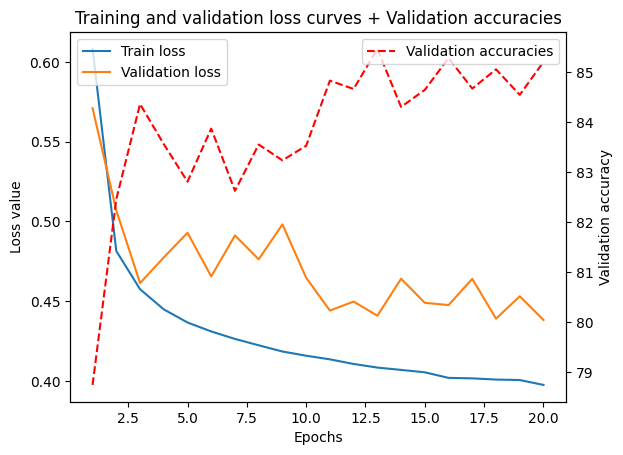

In [ ]:
# Plot the loss curves
epoch_indices = range(1, len(training_losses) + 1)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
# Plot the validation and train loss on the primary y-axis
ax1.set_ylabel('Loss value')
ax1.plot(epoch_indices, training_losses, label="Train loss")
ax1.plot(epoch_indices, val_losses, label="Validation loss")
ax1.set_xlabel("Epochs")
# Plot the validation accuracy on the secondary y-axis
ax2.set_ylabel('Validation accuracy')
ax2.plot(epoch_indices, val_accs, 'r--', label="Validation accuracies")
# Set title and legend
plt.title("Training and validation loss curves + Validation accuracies")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()

Nice! Looks like our baseline model did fairly well.

### 5.6 Summary

In this section, we explored how to build a baseline linear model, train it, evaluate its accuracy, and measure the training time.

As previously discussed, PyTorch allows us to construct neural network models by stacking common layers, such as the linear layer (`nn.Linear`) used in our model.
In practice, most models are built using a combination of fundamental layers like Linear, ReLU, and CNN, which are readily available in PyTorch.

Additionally, the `nn.Module` class is highly composable, enabling the creation of new layers by combining existing ones.
This flexibility allows for modular and efficient model design.

The arrangement of layers and their configurations defines the model architecture.
In the following sections, we will explore different models with varying architectures.

## <a id='sec_6'>6. Model V1: Building a better model with non-linearity</a>

As discussed in our previous tutorials, non-linear models have higher capacity than linear models.

In this section we will modify our model by adding some non-linear layers and see if it can perform better.

We'll do so by recreating a similar model to before, except this time we'll put non-linear functions (`nn.ReLU()`) in between each linear layer.

> **Note:** We will use common PyTorch nn modules as bricks to build our models, however, we will not discuss how they work. For more information on these modules (e.g., Linear, ReLU, CNN, ...), you may check [Daniel's course](https://github.com/mrdbourke/pytorch-deep-learning) or other deep-learning materials.

In [ ]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

The following image provides a visual representation of our model.

![visual representation of model_1](https://raw.githubusercontent.com/eborin/SSL-course/main/images/03_pytorch_computer_vision-5.0.png)

### 6.1 Training our model

Now let's instantiate it with the same settings as before and train it!

In [ ]:
set_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, hidden_units=10, output_shape=len(class_names))

training_elapsed_time, training_losses, val_losses, val_accs = \
    train_model(model_1, train_dataloader, val_dataloader,
                device=device, nepochs=number_of_epochs)

print(f"Trained model_1 on {str(next(model_1.parameters()).device)} for {len(training_losses)} epochs in {training_elapsed_time:.3f} seconds")

----------------------
Epoch: 1 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 531.82 batches/s]


Train loss: 1.07815 | Validation loss: 0.98876, Validation accuracy: 63.54%

----------------------
Epoch: 2 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 531.55 batches/s]


Train loss: 0.91550 | Validation loss: 0.88443, Validation accuracy: 67.64%

----------------------
Epoch: 3 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 528.07 batches/s]


Train loss: 0.70748 | Validation loss: 0.47010, Validation accuracy: 84.26%

----------------------
Epoch: 4 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 529.71 batches/s]


Train loss: 0.45346 | Validation loss: 0.46234, Validation accuracy: 83.81%

----------------------
Epoch: 5 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 497.64 batches/s]


Train loss: 0.43439 | Validation loss: 0.46450, Validation accuracy: 83.59%

----------------------
Epoch: 6 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 533.43 batches/s]


Train loss: 0.42021 | Validation loss: 0.44769, Validation accuracy: 85.02%

----------------------
Epoch: 7 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 531.21 batches/s]


Train loss: 0.41226 | Validation loss: 0.44857, Validation accuracy: 84.42%

----------------------
Epoch: 8 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 531.26 batches/s]


Train loss: 0.40377 | Validation loss: 0.43185, Validation accuracy: 84.77%

----------------------
Epoch: 9 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 531.61 batches/s]


Train loss: 0.39900 | Validation loss: 0.47668, Validation accuracy: 83.69%

----------------------
Epoch: 10 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 530.74 batches/s]


Train loss: 0.39444 | Validation loss: 0.43996, Validation accuracy: 83.92%

----------------------
Epoch: 11 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 529.73 batches/s]


Train loss: 0.38768 | Validation loss: 0.42596, Validation accuracy: 85.38%

----------------------
Epoch: 12 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 495.41 batches/s]


Train loss: 0.38475 | Validation loss: 0.44324, Validation accuracy: 84.12%

----------------------
Epoch: 13 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 506.29 batches/s]


Train loss: 0.37992 | Validation loss: 0.42615, Validation accuracy: 85.66%

----------------------
Epoch: 14 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 517.04 batches/s]


Train loss: 0.37798 | Validation loss: 0.43013, Validation accuracy: 84.95%

----------------------
Epoch: 15 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 495.45 batches/s]


Train loss: 0.37380 | Validation loss: 0.41423, Validation accuracy: 85.68%

----------------------
Epoch: 16 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 493.77 batches/s]


Train loss: 0.37180 | Validation loss: 0.41672, Validation accuracy: 85.67%

----------------------
Epoch: 17 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 505.76 batches/s]


Train loss: 0.36784 | Validation loss: 0.41242, Validation accuracy: 85.61%

----------------------
Epoch: 18 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 519.04 batches/s]


Train loss: 0.36771 | Validation loss: 0.42137, Validation accuracy: 85.21%

----------------------
Epoch: 19 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 530.07 batches/s]


Train loss: 0.36560 | Validation loss: 0.47162, Validation accuracy: 83.18%

----------------------
Epoch: 20 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 490.33 batches/s]

Train loss: 0.36272 | Validation loss: 0.42544, Validation accuracy: 85.46%

Trained model_1 on cuda:0 for 20 epochs in 89.017 seconds


Again, let's take a look at the training and validation loss curves and at the accuracy of the model on the validation set over the epochs.

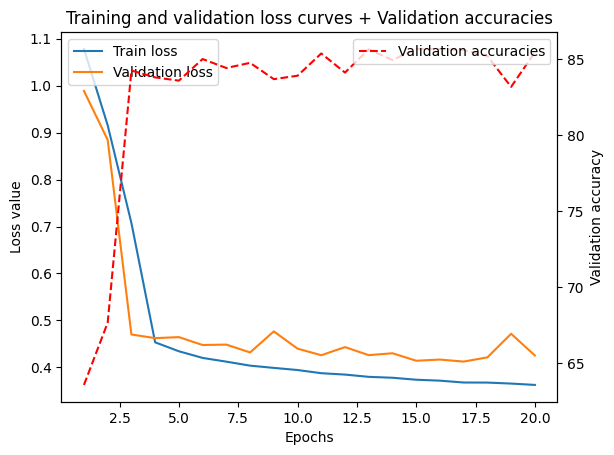

In [ ]:
# Plot the loss curves
epoch_indices = range(1, len(training_losses) + 1)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_ylabel('Loss value')
ax1.plot(epoch_indices, training_losses, label="Train loss")
ax1.plot(epoch_indices, val_losses, label="Validation loss")
ax2.set_ylabel('Validation accuracy')
ax2.plot(epoch_indices, val_accs, 'r--', label="Validation accuracies")
plt.title("Training and validation loss curves + Validation accuracies")
ax1.set_xlabel("Epochs")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()

Mmmm. Not as good as the previous one (at least in my computer). Maybe it needs more epochs (or a better optimizer) to achieve its full potential.

### 6.2 Summary

In this section, we examined how modifying the model architecture by introducing non-linear components, such as the `nn.ReLU` layer, impacts model performance.

Notably, the implementation of the new model remains largely similar to the previous one, differing only in the selection and arrangement of layers within the nn.Sequential block.

## <a id='sec_7'>7. Model V2: Building a Convolutional Neural Network</a>

It's time to create a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN or ConvNet).

CNN's are known for their capabilities to find patterns in visual data.

And since we're dealing with visual data, let's see if using a CNN model can improve upon our baseline.

To build our model, we will simply replace our linear layers by convolutional ones.

The CNN model we're going to be using is known as TinyVGG from the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website.

It follows the typical structure of a convolutional neural network:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

Where the contents of `[Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements.

> **Note:** We will use common PyTorch nn modules as bricks to build our models, however, we will not discuss how they work. For more information on these modules (e.g., Linear, ReLU, CNN, ...), you may check [Daniel's course](https://github.com/mrdbourke/pytorch-deep-learning) or other deep-learning materials.




### 7.1 The TinyVGG model

The following image provides a visual representation of our model. Notice that it is organized in three modules: `block_1`, `block_2`, and `classifier`.
The first two contain convolutional, relu, and max. pooling blocks while the final one contains a linear layer.

![visual representation of model_2](https://raw.githubusercontent.com/eborin/SSL-course/main/images/03_pytorch_computer_vision-6.0.png)

The next code block implements our model.


In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        #print(x.shape)
        x = self.block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x

### 7.2 Training our model

Now, lets instantiate and train our model!

To perform a fair comparison, we train for the same number of epochs.
However, since this model is more complex and takes longer to train (it took approx. 9 minutes to train for 20 epochs in my machine cpu), if you are in a hurry, you may change the number of epochs to 10 or even 5.

In [ ]:
set_seed(42)

model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names))

training_elapsed_time, training_losses, val_losses, val_accs = \
    train_model(model_2, train_dataloader, val_dataloader,
                device=device, nepochs=number_of_epochs)

print(f"Trained model_2 on {str(next(model_2.parameters()).device)} for {len(training_losses)} epochs in {training_elapsed_time:.3f} seconds")

----------------------
Epoch: 1 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 437.37 batches/s]


Train loss: 0.65555 | Validation loss: 0.41947, Validation accuracy: 85.09%

----------------------
Epoch: 2 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 470.26 batches/s]


Train loss: 0.37989 | Validation loss: 0.38140, Validation accuracy: 86.47%

----------------------
Epoch: 3 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 450.41 batches/s]


Train loss: 0.33489 | Validation loss: 0.34372, Validation accuracy: 87.50%

----------------------
Epoch: 4 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 470.47 batches/s]


Train loss: 0.31069 | Validation loss: 0.33878, Validation accuracy: 87.21%

----------------------
Epoch: 5 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 468.91 batches/s]


Train loss: 0.29939 | Validation loss: 0.31819, Validation accuracy: 89.03%

----------------------
Epoch: 6 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 468.88 batches/s]


Train loss: 0.28622 | Validation loss: 0.30812, Validation accuracy: 89.02%

----------------------
Epoch: 7 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 464.68 batches/s]


Train loss: 0.27892 | Validation loss: 0.28277, Validation accuracy: 89.92%

----------------------
Epoch: 8 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 458.26 batches/s]


Train loss: 0.27456 | Validation loss: 0.30015, Validation accuracy: 89.07%

----------------------
Epoch: 9 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 453.26 batches/s]


Train loss: 0.26750 | Validation loss: 0.31351, Validation accuracy: 89.45%

----------------------
Epoch: 10 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 437.39 batches/s]


Train loss: 0.26233 | Validation loss: 0.31270, Validation accuracy: 88.54%

----------------------
Epoch: 11 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 471.10 batches/s]


Train loss: 0.25809 | Validation loss: 0.30670, Validation accuracy: 89.23%

----------------------
Epoch: 12 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 444.76 batches/s]


Train loss: 0.25404 | Validation loss: 0.30972, Validation accuracy: 89.10%

----------------------
Epoch: 13 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 471.55 batches/s]


Train loss: 0.25065 | Validation loss: 0.29755, Validation accuracy: 89.93%

----------------------
Epoch: 14 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 472.35 batches/s]


Train loss: 0.24871 | Validation loss: 0.28272, Validation accuracy: 90.08%

----------------------
Epoch: 15 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 460.03 batches/s]


Train loss: 0.24440 | Validation loss: 0.28200, Validation accuracy: 89.91%

----------------------
Epoch: 16 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 445.57 batches/s]


Train loss: 0.24138 | Validation loss: 0.27523, Validation accuracy: 90.44%

----------------------
Epoch: 17 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 471.72 batches/s]


Train loss: 0.23732 | Validation loss: 0.26847, Validation accuracy: 90.41%

----------------------
Epoch: 18 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 448.87 batches/s]


Train loss: 0.23569 | Validation loss: 0.29037, Validation accuracy: 89.16%

----------------------
Epoch: 19 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 430.31 batches/s]


Train loss: 0.23544 | Validation loss: 0.28576, Validation accuracy: 90.03%

----------------------
Epoch: 20 / 20


Validation : 100%|██████████| 375/375 [00:00<00:00, 428.00 batches/s]

Train loss: 0.23164 | Validation loss: 0.27621, Validation accuracy: 90.08%

Trained model_2 on cuda:0 for 20 epochs in 110.687 seconds


Notice that the model took longer to train than the previous ones (You may compare the total time and also the amount of batches trained per second as reported in the Training and Validation progress bars).

Now, lets plot the curves.

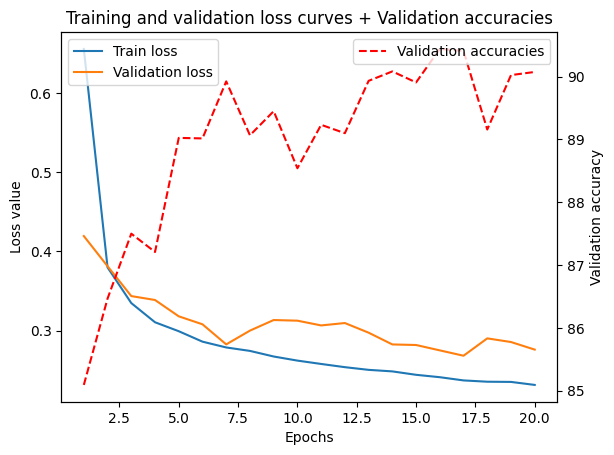

In [ ]:
# Plot the loss curves
epoch_indices = range(1, len(training_losses) + 1)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_ylabel('Loss value')
ax1.plot(epoch_indices, training_losses, label="Train loss")
ax1.plot(epoch_indices, val_losses, label="Validation loss")
ax2.set_ylabel('Validation accuracy')
ax2.plot(epoch_indices, val_accs, 'r--', label="Validation accuracies")
plt.title("Training and validation loss curves + Validation accuracies")
ax1.set_xlabel("Epochs")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()


Despite being slower to train, this model provides much better results than the previous ones.

## <a id='sec_8'>8. Handling the Challenge of Shape Mismatches</a>

The previous sections provided model implementations.
However, when building your own model or training loop, it is common to encounter issues related to tensor shapes.

The primary sources of these problems include:

* Some operations produce outputs with different shapes than expected. For example, `nn.MaxPool2D` typically reduces tensor dimensionality, while `nn.Conv2d` may increase it.
* Certain operations (`nn.Modules`, loss functions, etc.) expect input tensors to have a specific shape and will raise errors if the input data does not comply.

To avoid such issues, it is helpful to test how your layers behave and verify that they produce tensors with the expected shapes.

You can do this by creating random input tensors, passing them through individual layers (`nn.Modules`), and inspecting the output.

For example, the following code snippet generates a random tensor with shape [1, 1, 28, 28], representing a batch of one sample from the FashionMNIST dataset.

In [ ]:
sample_batch = torch.rand(size=(1,1,28,28))
print("sample_bach shape:", sample_batch.shape)

sample_bach shape: torch.Size([1, 1, 28, 28])


Now, lets instantitate the first neural network layers of our and check what happens with the data shape when processed by each layer.

In [ ]:
input_shape=1
hidden_units=10

# Instantiate the layers
l1 = nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1)
l2 = nn.ReLU()
l3 = nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1)
l4 = nn.ReLU()
l5 = nn.MaxPool2d(kernel_size=2, stride=2)

# Process the data in sequence and print their shape
print("Shape before l1:", sample_batch.shape)
x = l1(sample_batch)
print("Shape after l1:", x.shape)
x = l2(x)
print("Shape after l2:", x.shape)
x = l3(x)
print("Shape after l3:", x.shape)
x = l4(x)
print("Shape after l4:", x.shape)
x = l5(x)
print("Shape after l5:", x.shape)

Shape before l1: torch.Size([1, 1, 28, 28])
Shape after l1: torch.Size([1, 10, 28, 28])
Shape after l2: torch.Size([1, 10, 28, 28])
Shape after l3: torch.Size([1, 10, 28, 28])
Shape after l4: torch.Size([1, 10, 28, 28])
Shape after l5: torch.Size([1, 10, 14, 14])


Notice that some layers produce outputs with shapes that differ from the input tensor.

Try adjusting the layer parameters to observe their impact.
Start by changing the stride in l1 from 1 to 2 and see how it affects the output shape.

## <a id='sec_9'>9. (Extra) Make and evaluate random predictions with best model</a>

Alright, we've compared our models to each other, let's further evaluate our best performing model, `model_2`.

To do so, let's create a function `make_predictions()` where we can pass the model and some data for it to predict on.

In [ ]:
def make_predictions(model: torch.nn.Module, data: list, device):
    # Send model to device
    model.to(device)
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:

            # Prepare sample:
            #  1) the model forward method is expecting a batch of samples.
            #     Hence, we need to add an extra dimension to the data
            #  2) send it to the target device
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
val_samples = []
val_labels = []
for sample, label in random.sample(list(val_data), k=9):
    val_samples.append(sample)
    val_labels.append(label)

# View the first validation sample shape and label
print(f"Validation sample image shape: {val_samples[0].shape}")
print(f"Validation sample label: {val_labels[0]} ({class_names[val_labels[0]]})")

Validation sample image shape: torch.Size([1, 28, 28])
Validation sample label: 3 (Dress)


And now we can use our `make_predictions()` function to predict on `val_samples`.

In [ ]:
# Make predictions on validation samples with model 2
pred_probs= make_predictions(model=model_2, data=val_samples, device=device)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[8.0970e-05, 3.0261e-05, 4.9297e-06, 9.9973e-01, 3.0522e-06, 3.2508e-07,
         1.5267e-04, 8.2200e-07, 5.0466e-07, 4.5429e-07],
        [1.1450e-04, 6.8156e-06, 1.4800e-04, 6.3146e-06, 1.6012e-05, 3.2473e-06,
         1.9173e-05, 2.4642e-03, 9.9703e-01, 1.9363e-04]])

Excellent!

And now we can go from prediction probabilities to prediction labels by taking the `torch.argmax()` of the output of the `torch.softmax()` activation function.

In [ ]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([3, 8, 5, 1, 9, 3, 7, 4, 4])

In [ ]:
# Are our predictions in the same form as our validation labels?
val_labels, pred_classes

([3, 8, 5, 1, 9, 3, 7, 4, 4], tensor([3, 8, 5, 1, 9, 3, 7, 4, 4]))

Now our predicted classes are in the same format as our test labels, we can compare.

Since we're dealing with image data, let's stay true to the data explorer's motto.

"Visualize, visualize, visualize!"

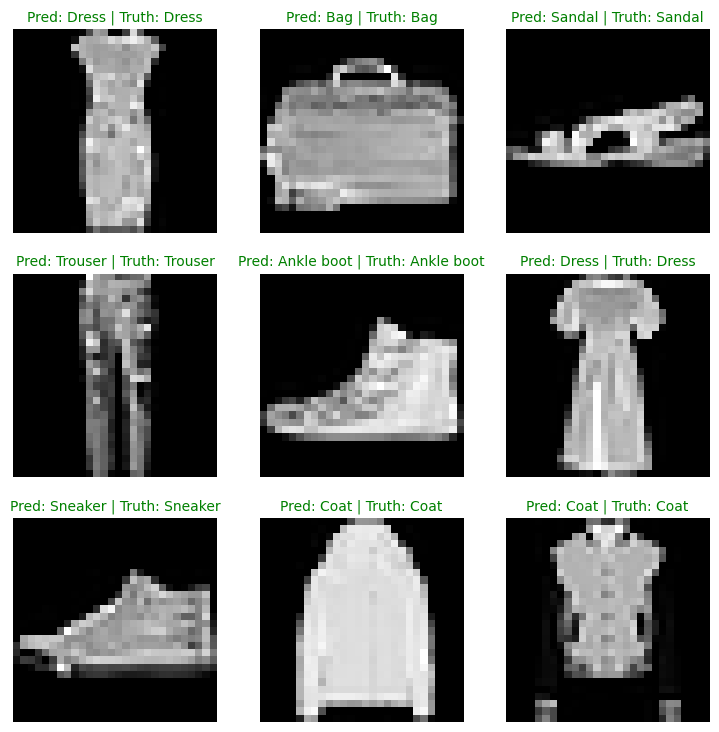

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(val_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[val_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False)

Well, well, well, doesn't that look good!

Not bad for a couple dozen lines of PyTorch code!

## <a id='sec_10'>10. (Extra) Making a confusion matrix for further prediction evaluation</a>

There are many [different evaluation metrics](https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics) we can use for classification problems.

One of the most visual is a [confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/).

A confusion matrix shows you where your classification model got confused between predictions and true labels.

To make a confusion matrix, we'll go through three steps:
1. Make predictions with our trained model, `model_2` (a confusion matrix compares predictions to true labels).
2. Make a confusion matrix using [`sklearn.metrics.confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).
3. Plot the confusion matrix using [`sklearn.metrics.ConfustionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html).

Let's start by making predictions with our trained model.

In [ ]:
from tqdm.auto import tqdm
import numpy as np

y_preds, y_trues = [], []
model_2.to(device)
model_2.eval()
val_acc = 0.0
with torch.inference_mode():
  for X, y in tqdm(val_dataloader, desc="Making predictions for test set"):
    # Do the forward pass
    y_logit = model_2(X.to(device))
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    #  note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu().numpy())
    y_trues.append(y.cpu().numpy())
    val_acc += accuracy_fn(y_true=y, y_pred=y_pred.cpu())
val_acc /= len(val_dataloader)
# Concatenate list of predictions into a tensor
y_preds = np.concatenate(y_preds)
y_trues = np.concatenate(y_trues)

print(f"Test accuracy: {val_acc:0.2f} %")

Making predictions for test set: 100%|██████████| 375/375 [00:00<00:00, 453.88it/s]

Test accuracy: 90.08 %


Now, lets compute the confusion matrix and plot it.

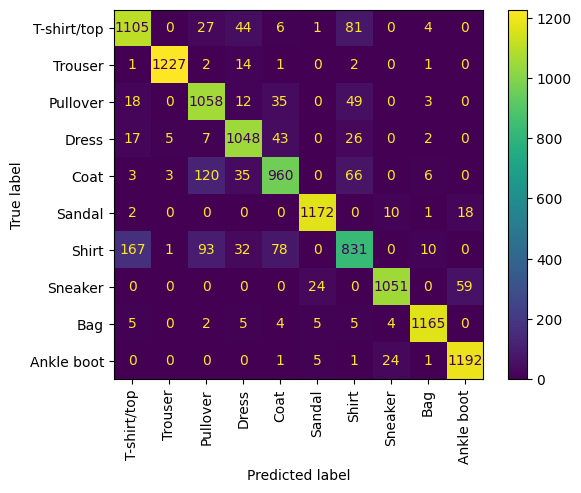

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_trues, y_pred=y_preds)
ConfusionMatrixDisplay(cm,display_labels=class_names).plot(xticks_rotation="vertical")


Woah! Doesn't that look good?

We can see our model does fairly well since most of the yellow squares are down the diagonal from top left to bottom right (and ideal model will have only values in these squares and 0 everywhere else).

The model gets most "confused" on classes that are similar, for example predicting "Pullover" for images that are actually labelled "Shirt".

And the same for predicting "Shirt" for classes that are actually labelled "T-shirt/top".

This kind of information is often more helpful than a single accuracy metric because it tells use *where* a model is getting things wrong.

It also hints at *why* the model may be getting certain things wrong.

It's understandable the model sometimes predicts "Shirt" for images labelled "T-shirt/top".

We can use this kind of information to further inspect our models and data to see how it could be improved.

> **Exercise:** Use the trained `model_2` to make predictions on the test FashionMNIST dataset.
Then plot some predictions where the model was wrong alongside what the label of the image should've been.
After visualizing these predictions do you think it's more of a modelling error or a data error? As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

## Exercises

There is no designated exercise for this tutorial.
However, the following activities can help you gain valuable insights on variables that affect the model performance.
* Check how the models trained in this notebook perform on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. The following code downloads the test data:
```python
    # Setup FashionMNIST test data
    test_data = datasets.FashionMNIST(
        root="data",
        train=False, # get test data
        download=True,
        transform=ToTensor()
    )
```
  > Note: create a function that computes the model accuracy on the test dataset so you can use this function on the following exercises.
* Use different seeds to initialize the models with 5 alternative random values and verify wether the models' accuracies change.
* Compute the average accuracy and the standard deviation and try to compare the performance of the three models considering all the 5 runs.
* Try using alternative model architectures (e.g., try changing the models by replacing or adding layers)
* Explore how the hyperparameters values (e.g., number of epochs, learning rate, optimizer, etc) affect the learning process and the models' performance.
* Adapt the code to run on a GPU and measure how faster the computation would be on a GPU.
* Explore the performance of these models on different datasets. You may try the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.
* Explore how early stop (selecting the parameters that achieved the best validation loss) affect the performance of the models. You may train `model_2` for more epochs and check if the model is overfitting by checking the train and validation loss curves.
If so, compare the performance of the model using the parameters found in the last epoch agains the model using the parameters that achieved the best validation loss.
Use the Fashion MNIST test set to verify the final models' performances.
